In [9]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")

In [0]:
mch = pd.read_csv('/content/drive/My Drive/FTMLE - Tonga/Week_3/assignments/datasets/06-world-cup/matches.csv')
pls = pd.read_csv('/content/drive/My Drive/FTMLE - Tonga/Week_3/assignments/datasets/06-world-cup/players.csv')
wc = pd.read_csv('/content/drive/My Drive/FTMLE - Tonga/Week_3/assignments/datasets/06-world-cup/winners.csv')

# working on GG Drive csv data
# wc = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Dataset/fifa-world-cup/WorldCups.csv')
# mch = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Dataset/fifa-world-cup/WorldCupMatches.csv')
# pls = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Dataset/fifa-world-cup/WorldCupPlayers.csv')

# # working on local csv data
# wc = pd.read_csv('/media/tee/Data/Coder School/_tonga/week3/w3-Data-Analysis-WorldCup-Dataset/Data/WorldCups.csv')
# mch = pd.read_csv('/media/tee/Data/Coder School/_tonga/week3/w3-Data-Analysis-WorldCup-Dataset/Data/WorldCupMatches.csv')
# pls = pd.read_csv('/media/tee/Data/Coder School/_tonga/week3/w3-Data-Analysis-WorldCup-Dataset/Data/WorldCupPlayers.csv')

---
# Week 3 Project - Data Analysis - World Cup Dataset


---
## I. Project Infomation

    - Data about FIFA World Cup from 1930 to 2014.
    - Dataset has infomation about the league, matches and players.
    - This project is about using the data to show a picture about the FIFA World Cup for every football fan all around the world.


---
## II. Data Infomation
    
    - Data sets include 3 tables

---
<div>
<p style="text-align: center;"><strong>
1 - Worldcups: Infomation about each FIFA World Cup.
</strong></p> 

| Column Name    | Description                        | Data Type |
| -------------- | ---------------------------------- | --------- |
| Year           | Year of the worldcup               | int64     |
| Country        | Country of the worldcup            | object    |
| Winner         | Team who won the worldcup          | object    |
| Runners-Up     | Team who was the second place      | object    |
| Third          | Team who was the third place       | object    |
| Fourth         | Team who was the fourth place      | object    |
| GoalsScored    | Total goals scored in the worldcup | int64     |
| QualifiedTeams | Total participating teams          | int64     |
| MatchesPlayed  | Total matches played in the cup    | int64     |
| Attendance     | Total attendance of the worldcup   | object    |

</div>

In [0]:
display(wc.head(5))

---
<div>
<p style="text-align: center;"><strong>
2 - Matches: Infomation about world cup matches.
</strong></p> 


| Column Name          | Description                                                             | Data Type |
| -------------------- | ----------------------------------------------------------------------- | --------- |
| Year                 | The year in which the match was played                                  | float64   |
| Datetime             | The Date on which the match was played along with a 24 hour format time | object    |
| Stage                | The stage at which the match was played                                 | object    |
| Stadium              | Stadium name where the match was held                                   | object    |
| City                 | The city name, where the match was played                               | object    |
| Home Team Name       | Home team country name                                                  | object    |
| Home Team Goals      | Total goals scored by the home team by the end of the match             | float64   |
| Away Team Goals      | Total goals scored by the away team by the end of the match             | float64   |
| Away Team Name       | Away team country name                                                  | object    |
| Win conditions       | Special win condition (if any)                                          | object    |
| Attendance           | Total crowd present at the satdium                                      | float64   |
| Half-time Home Goals | Goals scored by the home team until half time                           | float64   |
| Half-time Away Goals | Goals scored by the away team until half time                           | float64   |
| Referee              | Name of the first refree                                                | object    |
| Assistant 1          | Name of the first assistant referee (linesman)                          | object    |
| Assistant 2          | Name of the second assistant referee (linesman)                         | object    |
| RoundID              | Unique ID of the Round                                                  | float64   |
| MatchID              | Unique ID of the match                                                  | float64   |
| Home Team Initials   | Home team country's three letter initials                               | object    |
| Away Team Initials   | Away team country's three letter initials                               | object    |


</div>

In [0]:
display(mch.head(5))

---
<div>
<p style="text-align: center;"><strong>
3 - Players: Infomation about football players participated.
</strong></p> 


| Column Name   | Description                                                                                                                                         | Data Type |
| ------------- | --------------------------------------------------------------------------------------------------------------------------------------------------- | --------- |
| RoundID       | Unique ID of the round                                                                                                                              | int64     |
| MatchID       | Unique ID of the match                                                                                                                              | int64     |
| Team Initials | Player's team initials                                                                                                                              | object    |
| Coach Name    | Name and country of the team coach                                                                                                                  | object    |
| Line-up       | S=Line-up, N=Substitute                                                                                                                             | object    |
| Shirt Number  | Shirt number if available                                                                                                                           | int64     |
| Player Name   | Name of the player                                                                                                                                  | object    |
| Position      | C=Captain, GK=Goalkeeper                                                                                                                            | object    |
| Event         | G=Goal, OG=Own Goal, Y=Yellow Card, R=Red Card, SY = Red Card by second yellow, P=Penalty, MP=Missed Penalty, I = Substitution In, O=Substitute Out | object    |

</div>

In [0]:
display(pls.head(5))

MatchID Team Initials       Player Name     Event
0     1096           FRA       Alex THEPOT  No Event
1     1096           MEX   Oscar BONFIGLIO  No Event
2     1096           FRA  Marcel LANGILLER      G40'
3     1096           MEX      Juan CARRENO      G70'
4     1096           FRA   Ernest LIBERATI  No Event

<div>
<p style="text-align: center;"><strong>
Players: Infomation about football players competed in 1930-2014
</strong></p> 


| Column Name   | Description                                                                                                                                         | Data Type |
| ------------- | --------------------------------------------------------------------------------------------------------------------------------------------------- | --------- |
| RoundID       | Unique ID of the round                                                                                                                              | int64     |
| MatchID       | Unique ID of the match                                                                                                                              | int64     |
| Team Initials | Player's team initials                                                                                                                              | object    |
| Coach Name    | Name and country of the team coach                                                                                                                  | object    |
| Line-up       | S=Line-up, N=Substitute                                                                                                                             | object    |
| Shirt Number  | Shirt number if available                                                                                                                           | int64     |
| Player Name   | Name of the player                                                                                                                                  | object    |
| Position      | C=Captain, GK=Goalkeeper                                                                                                                            | object    |
| Event         | G=Goal, OG=Own Goal, Y=Yellow Card, R=Red Card, SY = Red Card by second yellow, P=Penalty, MP=Missed Penalty, I = Substitution In, O=Substitute Out | object    |

</div>

---
III. Data Cleaning


---
1 - Clean null, duplicate data, error data.

---
- Table WorldCup is cleaned. No duplicate data.

In [16]:
wc.nunique()

Year              20
Country           15
Winner             9
Runners-Up        10
Third             14
Fourth            16
GoalsScored       17
QualifiedTeams     5
MatchesPlayed      9
Attendance        20
dtype: int64

---
- Table World Cup Matches: 852/4572 rows not null.


In [0]:
# Drop null rows
mch.drop(labels = mch[mch['Year'].isnull()].index, axis= 0, inplace= True)

In [0]:
dup_mch = mch['MatchID'].value_counts() # MatchID has duplicate rows
dup_id = dup_mch[dup_mch == 2]
mch[mch['MatchID'].isin(dup_id.index)]['Year']  #  The duplicate datas are matches in 2014

In [0]:
# Drop duplicate rows
mch.drop_duplicates(keep="first", inplace=True)
mch.info()  # table Matches have 836 cleaned data rows

In [0]:
# Fix text error in Stadium name
mch['Stadium'].unique()
""" Some Brazil Stadium name got error.
    'Maracan� - Est�dio Jornalista M�rio Filho', 'Estadio Jos� Mar�a Minella', 'Stade V�lodrome',
    'Nou Camp - Estadio Le�n', 'Estadio Ol�mpico Chateau Carreras', 'Estadio Ol�mpico Universitario', 'Estadio Municipal de Bala�dos'
"""
wrong_name = ['Maracan� - Est�dio Jornalista M�rio Filho', 'Estadio Jos� Mar�a Minella', 'Stade V�lodrome',
              'Nou Camp - Estadio Le�n', 'Estadio Ol�mpico Chateau Carreras', 'Estadio Ol�mpico Universitario', 'Estadio Municipal de Bala�dos']
right_name = ['Maracana - Estadio Jornalista Mario Filho', 'Estadio Jose Maria Minella', 'Stade Velodrome',
              'Nou Camp - Estadio Leon', 'Estadio Olimpico Chateau Carreras', 'Estadio Olimpico Universitario', 'Estadio Municipal de Balaidos']
for w, r in zip(wrong_name, right_name):
    mch['Stadium'].replace(w, r, inplace= True)
# mch['Stadium'].unique()

In [0]:
# Convert float value to interger
mch['Year'] = mch['Year'].astype(int)

In [0]:
# Combine Initials into Team Name to drop Initials column

mch['Home Team Name'] = mch['Home Team Name'] + ' (' + mch['Home Team Initials'] +')'
mch['Away Team Name'] = mch['Away Team Name'] + ' (' + mch['Away Team Initials'] +')'

In [0]:
# name_error = ['rn">Trinidad and Tobago (TRI)', "C�te d'Ivoire (CIV)",'rn">Republic of Ireland (IRL)','rn">Bosnia and Herzegovina (BIH)','rn">United Arab Emirates (UAE)']

mch['Home Team Name'] = mch['Home Team Name'].str.replace('rn">','')
mch['Home Team Name'].replace("C�te d'Ivoire (CIV)",  "Cote d'Ivoire (CIV)", inplace=True)
# mch['Home Team Name'].unique()

mch['Away Team Name'] = mch['Away Team Name'].str.replace('rn">','')
mch['Away Team Name'].replace("C�te d'Ivoire (CIV)",  "Cote d'Ivoire (CIV)", inplace=True)
# mch['Away Team Name'].unique()

In [0]:
# Matches 'Attendance' has 1 NaN value

mch['Attendance'].fillna(0,inplace=True)
mch[mch['Attendance'].isnull()]

In [0]:
# Convert data type from float to int

mch['Year'] = mch['Year'].astype('int')
mch['Home Team Goals'] = mch['Home Team Goals'].astype('int')
mch['Away Team Goals'] = mch['Away Team Goals'].astype('int')
mch['Attendance'] = mch['Attendance'].astype('int')
mch['RoundID'] = mch['RoundID'].astype('int')
mch['MatchID'] = mch['MatchID'].astype('int')
mch.sample(1)

In [0]:
#  Drop column half time goals, initials

mch.drop(columns=['Half-time Home Goals', 'Half-time Away Goals','Home Team Initials','Away Team Initials'], inplace=True)

In [0]:
# Convert column 'Datetime' to datetime data type and remove the hour data
mch['Datetime'] = pd.to_datetime(mch['Datetime'])
mch['Datetime'] = mch['Datetime'].dt.date
mch['Datetime']

---
- Table Players

In [0]:
pls.info() # pls table has 37848 clean rows

In [0]:
pls.drop_duplicates(keep="first", inplace=True)
pls.info() # pls table has 37048 clean rows

In [0]:
pls.sample(1)

In [0]:
 # Fill data to null row in column 'Event'
pls['Event'].isnull().sum() # Position column has 28225 null rows
pls['Event'].fillna('No Event', inplace=True)

In [0]:
# Drop columns from table Players
pls.drop(columns=['RoundID', 'Coach Name', 'Line-up', 'Shirt Number', 'Position'], inplace=True)

In [0]:
pls.sample()

---
### III - Analyze Data

---
#### 1.  Summary of Worldcup infomation: team, winner, matches, goal
    

- 1.1 Total matches played and qualified teams by year

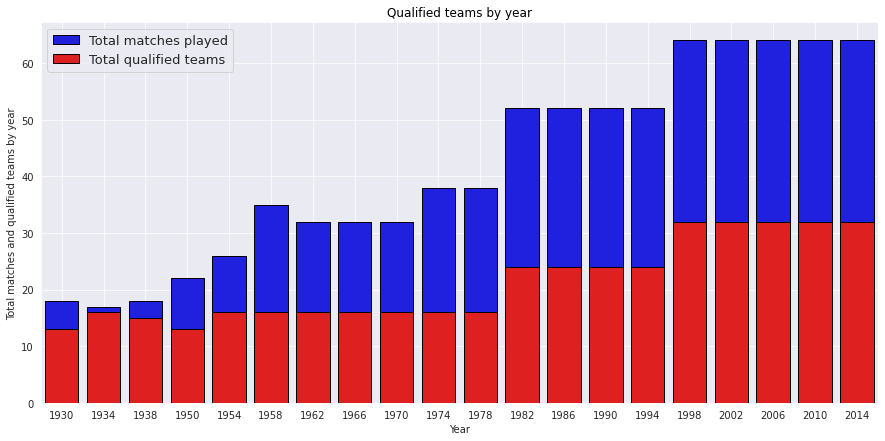

In [33]:
plt.figure(figsize=(15,7))
sns.barplot(wc["Year"], wc["MatchesPlayed"], linewidth=1,
            edgecolor="k"*len(wc), color="b", label="Total matches played")
sns.barplot(wc["Year"], wc["QualifiedTeams"], linewidth=1,
            edgecolor="k"*len(wc), color="r", label="Total qualified teams")
plt.legend(loc="best", prop={"size":13})
plt.title("Qualified teams by year", color='k')
plt.grid(True)
plt.ylabel("Total matches and qualified teams by year")
plt.show()

- 1.2 Total attendence of world cups by year

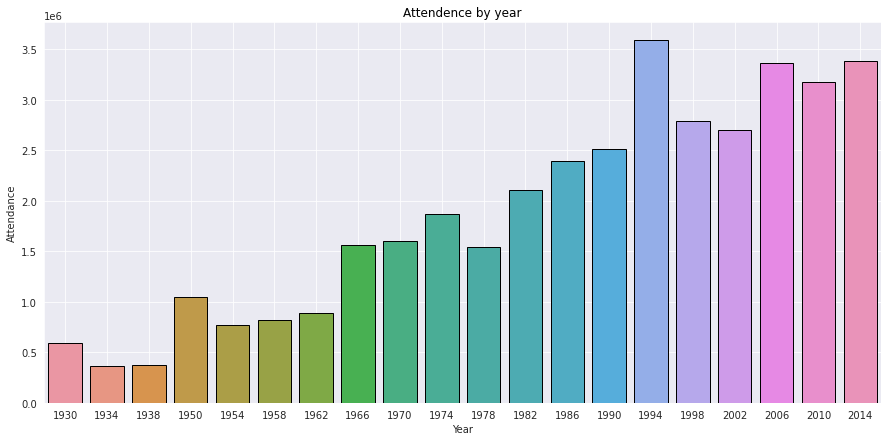

In [32]:
att = mch.groupby("Year")["Attendance"].sum().reset_index()

sns.set_style("darkgrid")
plt.figure(figsize=(15,7))
sns.barplot(att["Year"], att["Attendance"], linewidth = 1, edgecolor="k"*len(att))
plt.grid(True)
plt.title("Attendence by year", color='k')
plt.show()

- 1.3 Average attendence by year

- 1.4 Total goals scored by year

- 1.5 Cities that hosted highest world cup matches

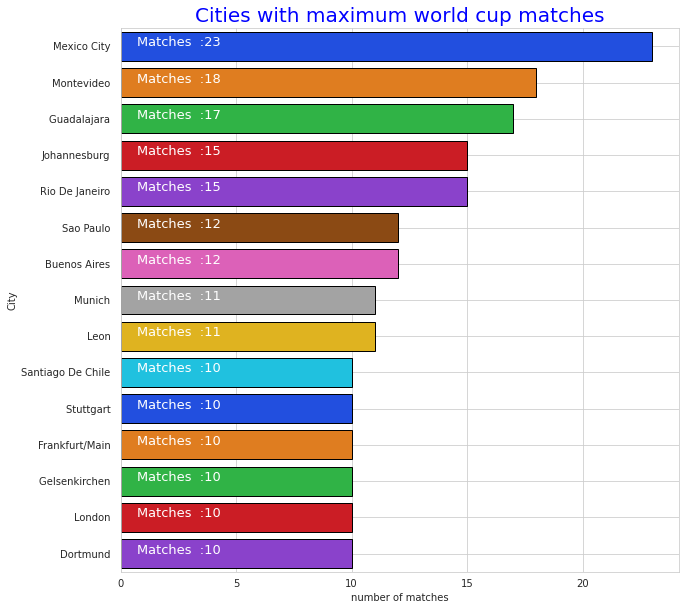

In [0]:
top10_city = mch['City'].value_counts().reset_index()
plt.figure(figsize=(10,10))
ax = sns.barplot(y=top10_city["index"][:15],x = top10_city["City"][:15],palette="bright",
                 linewidth=1,edgecolor="k"*15)
plt.xlabel("number of matches")
plt.ylabel("City")
plt.grid(True)
plt.title("Cities with maximum world cup matches",color='b',fontsize=20)

for i,j in enumerate("Matches  :" + top10_city["City"][:15].astype(str)):
    ax.text(.7,i,j,fontsize = 13,color="w")
plt.show()

- 1.6 Average attendance by city

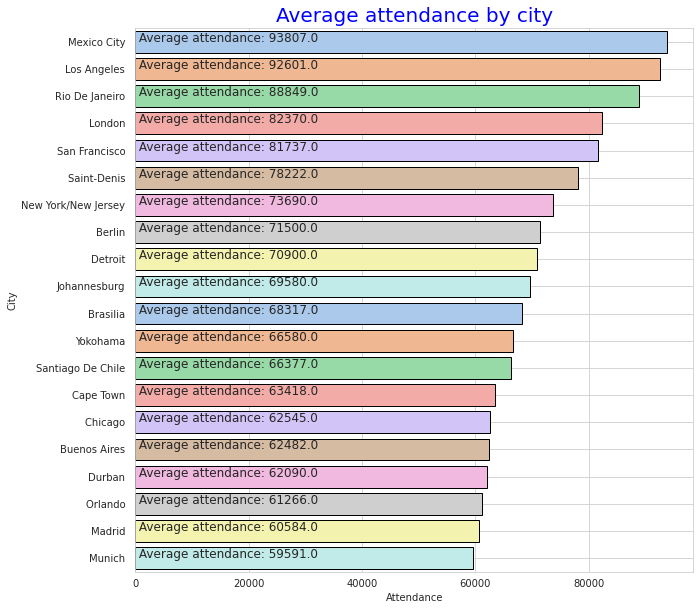

In [0]:
ct_at = mch.groupby("City")["Attendance"].mean().reset_index()
ct_at = ct_at.sort_values(by="Attendance",ascending=False)
ct_at

plt.figure(figsize=(10,10))

ax = sns.barplot("Attendance","City",
            data=ct_at[:20],
            linewidth = 1,
            edgecolor = "k"*20,
            palette  = "pastel")

for i,j in enumerate(" Average attendance: "+np.around(ct_at["Attendance"][:20],0).astype(str)):
    ax.text(0,i,j,fontsize=12)
plt.grid(True)

plt.title("Average attendance by city",color='b',fontsize=20)
plt.show()


---
#### 2. Detail about teamsDetail about maches


- 2.1 Teams with the most world cup final victories

In [35]:
wc["Year1"] = wc["Year"].astype(str)
c1  = wc.groupby("Winner")["Year1"].apply(" , ".join).reset_index()
c2  = wc.groupby("Winner")['Year'].count().reset_index()
c12 = c1.merge(c2, left_on="Winner", right_on="Winner", how="left")
c12 = c12.sort_values(by = "Year",ascending =False)

plt.figure(figsize=(15,8))
ax = sns.barplot("Year","Winner",data=c12,
            palette="jet_r",
            alpha=.8,
            linewidth=2,
            edgecolor="k"*len(c12))
for i,j in enumerate("Years : " + c12["Year1"]):
    ax.text(.1,i,j,weight = "bold")

plt.title("Teams with the most world cup final victories")
plt.grid(True)
plt.xlabel("count")
plt.show()

- 2.2 World cup final results by nation

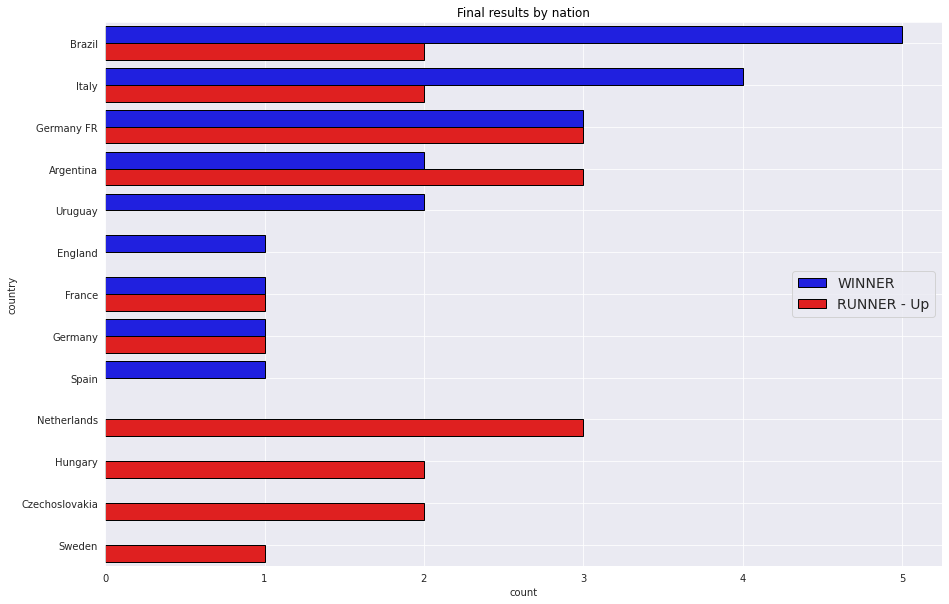

In [36]:
cou = wc["Winner"].value_counts().reset_index()
cou_w = cou.copy()
cou_w.columns = ["country","count"]
cou_w["type"] = "WINNER"

cou_r = wc["Runners-Up"].value_counts().reset_index()
cou_r.columns = ["country","count"]
cou_r["type"] = "RUNNER - Up"

cou_t = pd.concat([cou_w,cou_r], axis=0)

plt.figure(figsize=(15,10))
sns.barplot("count","country", data=cou_t,
            hue="type", palette=["b","r"],
            linewidth=1, edgecolor="k"*len(cou_t))
plt.grid(True)
plt.legend(loc="center right",prop={"size":14})
plt.title("Final results by nation",color='k')
plt.show()

- 2.3. World cup final result for third and fourth place by nation

- 2.4. Teams with the most world cup matches

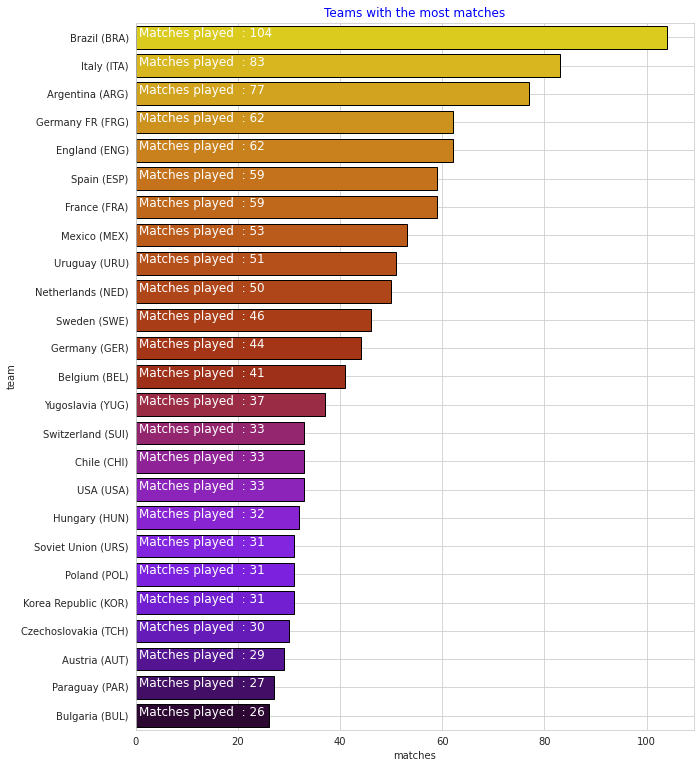

In [0]:
ht = mch["Home Team Name"].value_counts().reset_index()
ht.columns = ["team","matches"]
at = mch["Away Team Name"].value_counts().reset_index()
at.columns = ["team","matches"]
mt = pd.concat([ht,at],axis=0)
mt = mt.groupby("team")["matches"].sum().reset_index().sort_values(by="matches",ascending=False)

plt.figure(figsize=(10,13))
ax = sns.barplot("matches","team",data=mt[:25],palette="gnuplot_r",
                 linewidth=1,edgecolor="k"*25)
plt.grid(True)
plt.title("Teams with the most matches",color='b')
for i,j in enumerate("Matches played  : " + mt["matches"][:25].astype(str)):
    ax.text(.7,i,j,fontsize=12,color="white")

- 2.5. Teams with the most tournament participations

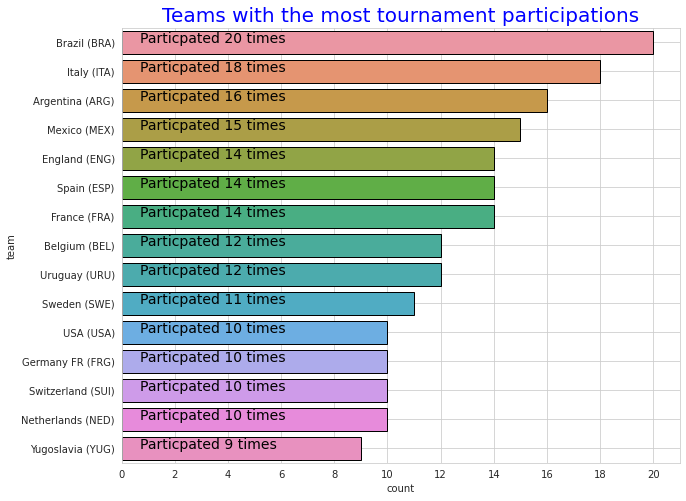

In [0]:
home = mch[["Year","Home Team Name"]]
home.columns = ["year","team"]
home["type"] = "HOME TEAM"
away = mch[["Year","Away Team Name"]]
away.columns = ["year","team"]
away["type"] = "AWAY TEAM"

home_away = pd.concat([home,away],axis=0)
yt = home_away.groupby(["year","team"]).count().reset_index()
yt = yt["team"].value_counts().reset_index()

plt.figure(figsize=(10,8))
ax = sns.barplot("team","index",data=yt[:15],linewidth=1,edgecolor="k"*15)

for i,j in enumerate("Particpated " + yt["team"][:15].astype(str) + " times"):
    ax.text(.7,i,j,fontsize=14,color="k",)
plt.grid(True)
    
plt.title("Teams with the most tournament participations",color='b',fontsize=20)
plt.ylabel("team")
plt.xlabel("count")
plt.xticks(np.arange(0,22,2))
plt.show()

- 2.6. Match outcomes by countries

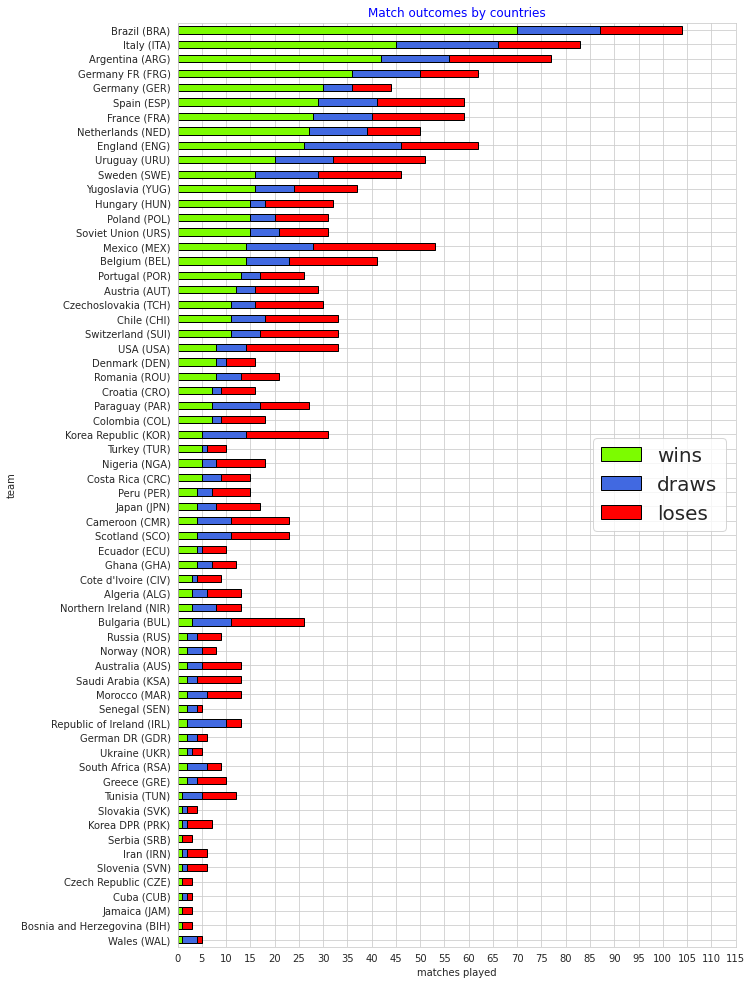

In [0]:
def label(mch):
    if mch["Home Team Goals"] > mch["Away Team Goals"]:
        return "Home team win"
    if mch["Away Team Goals"] > mch["Home Team Goals"]:
        return "Away team win"
    if mch["Home Team Goals"] == mch["Away Team Goals"]:
        return "DRAW"

mch["outcome"] = mch.apply(lambda mch:label(mch),axis=1)

mch[['Home Team Name','Home Team Goals', 'Away Team Goals', 'Away Team Name',"outcome"]]

def win_label(mch):
    if mch["Home Team Goals"] > mch["Away Team Goals"]:
        return mch["Home Team Name"]
    if mch["Home Team Goals"] < mch["Away Team Goals"]:
        return mch["Away Team Name"]
    if mch["Home Team Goals"] == mch["Away Team Goals"]:
        return "DRAW"
    
def lst_label(mch):
    if mch["Home Team Goals"] < mch["Away Team Goals"]:
        return mch["Home Team Name"]
    if mch["Home Team Goals"] > mch["Away Team Goals"]:
        return mch["Away Team Name"]
    if mch["Home Team Goals"] == mch["Away Team Goals"]:
        return "DRAW"

mch["win_team"]  = mch.apply(lambda mch:win_label(mch),axis=1)
mch["lost_team"] = mch.apply(lambda mch:lst_label(mch),axis=1)
lst = mch["lost_team"].value_counts().reset_index()
win = mch["win_team"].value_counts().reset_index()
wl  = win.merge(lst,left_on="index",right_on="index",how="left")
wl = wl[wl["index"] != "DRAW"]
wl.columns  = ["team","wins","loses"]

wl1 = wl.copy()
wl1 = wl1.merge(mt,left_on="team",right_on="team",how="left")
wl1["draws"] = wl1["matches"]-(wl1["wins"]+wl1["loses"])
wl1.index = wl1.team
wl1 = wl1.sort_values(by="wins",ascending=True)
wl1[["wins","draws","loses"]].plot(kind="barh",stacked=True,figsize=(10,17),
                                 colors=["lawngreen","royalblue","r"],
                                  linewidth=1,edgecolor="k"*len(wl1))
plt.legend(loc="center right",prop={"size":20})
plt.xticks(np.arange(0,120,5))
plt.title("Match outcomes by countries",color='b')
plt.xlabel("matches played")
plt.show()

---
#### 3. Detail about matches


- 3.1. Matches with highest number of attendance

In [53]:
h_att = mch.sort_values(by="Attendance",ascending=False)[:10]
h_att = h_att[['Year', 'Datetime','Stadium', 'City', 'Home Team Name',
              'Home Team Goals', 'Away Team Goals', 'Away Team Name', 'Attendance', 'MatchID']]
h_att["Datetime"] = h_att["Datetime"].astype(str).str.split("-").str[0]
h_att["mt"] = h_att["Home Team Name"] + " .Vs.  " + h_att["Away Team Name"]

plt.figure(figsize=(10,9))
ax = sns.barplot(y =h_att["mt"],x = h_att["Attendance"],palette="gist_ncar",
                 linewidth = 1,edgecolor="k"*len(h_att))
plt.ylabel("match teams")
plt.xlabel("Attendance")
plt.title("Matches with highest number of attendace",color='b')
plt.grid(True)
for i,j in enumerate(" stadium : "+h_att["Stadium"]+" , Date :" + h_att["Datetime"]):
    ax.text(.7,i,j,fontsize = 12,color="white",weight = "bold")
plt.show()


- 3.2. Match outcomes by home and away teams

In [57]:
def label(mch):
    if mch["Home Team Goals"] > mch["Away Team Goals"]:
        return "Home team win"
    if mch["Away Team Goals"] > mch["Home Team Goals"]:
        return "Away team win"
    if mch["Home Team Goals"] == mch["Away Team Goals"]:
        return "DRAW"

mch["outcome"] = mch.apply(lambda mch:label(mch),axis=1)

mch[['Home Team Name','Home Team Goals', 'Away Team Goals', 'Away Team Name',"outcome"]]

def win_label(mch):
    if mch["Home Team Goals"] > mch["Away Team Goals"]:
        return mch["Home Team Name"]
    if mch["Home Team Goals"] < mch["Away Team Goals"]:
        return mch["Away Team Name"]
    if mch["Home Team Goals"] == mch["Away Team Goals"]:
        return "DRAW"
    
def lst_label(mch):
    if mch["Home Team Goals"] < mch["Away Team Goals"]:
        return mch["Home Team Name"]
    if mch["Home Team Goals"] > mch["Away Team Goals"]:
        return mch["Away Team Name"]
    if mch["Home Team Goals"] == mch["Away Team Goals"]:
        return "DRAW"
    
ht = mch["Home Team Name"].value_counts().reset_index()
ht.columns = ["team","matches"]
at = mch["Away Team Name"].value_counts().reset_index()
at.columns = ["team","matches"]
mt = pd.concat([ht,at],axis=0)
mt = mt.groupby("team")["matches"].sum().reset_index().sort_values(by="matches",ascending=False)

mch["win_team"]  = mch.apply(lambda mch:win_label(mch),axis=1)
mch["lost_team"] = mch.apply(lambda mch:lst_label(mch),axis=1)
lst = mch["lost_team"].value_counts().reset_index()
win = mch["win_team"].value_counts().reset_index()
wl  = win.merge(lst,left_on="index",right_on="index",how="left")
wl = wl[wl["index"] != "DRAW"]
wl.columns  = ["team","wins","loses"]

wl1 = wl.copy()
wl1 = wl1.merge(mt,left_on="team",right_on="team",how="left")
wl1["draws"] = wl1["matches"]-(wl1["wins"]+wl1["loses"])
wl1.index = wl1.team
wl1 = wl1.sort_values(by="wins",ascending=True)
wl1[["wins","draws","loses"]].plot(kind="barh",stacked=True,figsize=(10,17),
                                 colors=["lawngreen","royalblue","r"],
                                  linewidth=1,edgecolor="k"*len(wl1))
plt.legend(loc="center right",prop={"size":12})
plt.xticks(np.arange(0,120,5))
plt.title("Match outcomes by countries",color='k')
plt.xlabel("matches played")
plt.show()

- 3.3. Distribution of home and away goals

- 3.4. Teams with highest fifa world cup goals

- 3.5. Highest total goals scored during a match

In [0]:
mch['Datetime']

0      1930-07-13
1      1930-07-13
2      1930-07-14
3      1930-07-14
4      1930-07-15
          ...    
831    2014-07-05
832    2014-06-29
833    2014-06-29
834    2014-07-01
835    2014-07-01
Name: Datetime, Length: 836, dtype: object

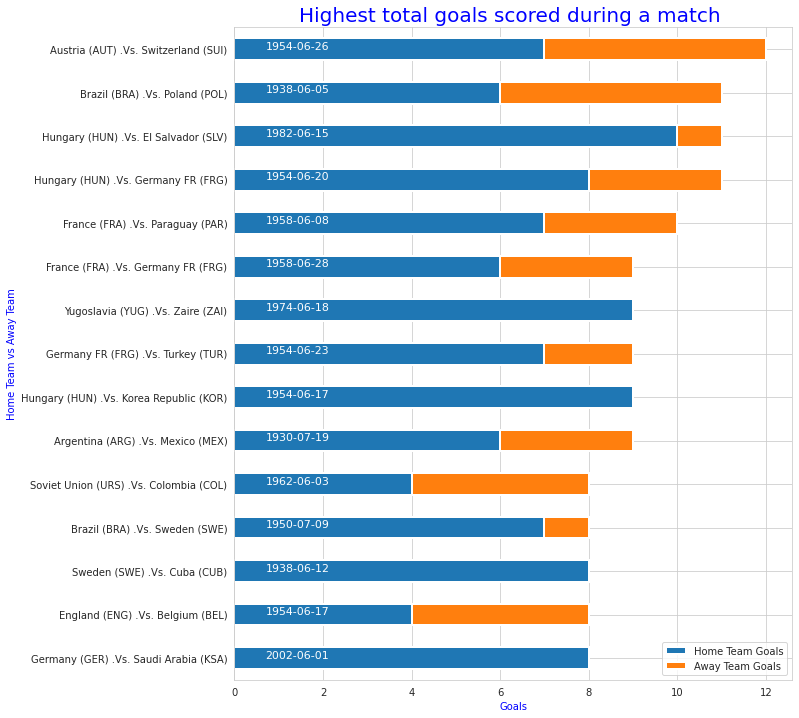

In [0]:
mch["total_goals"] = mch["Home Team Goals"] + mch["Away Team Goals"]
hig_gl = mch.sort_values(by="total_goals",ascending =False)[:15][['Year', 'Datetime', 'Stage', 'Stadium', 'City', 'Home Team Name',
                                                                  'Home Team Goals', 'Away Team Goals', 'Away Team Name',"total_goals"]]
hig_gl["match"] = hig_gl["Home Team Name"] + " .Vs. " + hig_gl['Away Team Name']
hig_gl.index = hig_gl["match"]
hig_gl = hig_gl.sort_values(by="total_goals",ascending =True)

ax= hig_gl[["Home Team Goals","Away Team Goals"]].plot(kind="barh", figsize=(10,12),stacked=True, linewidth=2, edgecolor="w"*15)

plt.ylabel("Home Team vs Away Team",color="b")
plt.xlabel("Goals",color="b")
plt.title("Highest total goals scored during a match ",color='b', fontsize=20)
hig_gl["Datetime"].astype('object')
for i,j in enumerate(hig_gl['Datetime']):
    ax.text(.7,i,j,color="w",fontsize=11)

plt.show()

- 3.6. Total goals scored during games by year

In [0]:
plt.figure(figsize=(13,8))
sns.boxplot(y=mch["total_goals"], x=mch["Year"])
plt.ylabel('Total Goals')
plt.grid(True)
plt.title("Total goals scored during game by year",color='b', fontsize=20)
plt.show()

---
#### 4. Team comparator


- 4.1. Portugal & Argentina

In [0]:
team_compare("Portugal","Argentina")

- 4.2. France & Croatia

In [0]:
team_compare("France","Croatia")

- 4.3. Spain & Italy

- 4.4. Brazil & Germany

- 4.5. Win-Lost-Goals betweens Winner and Runner-up each year.

- 4.6. Win-Lost-Goals betweens Third and Fourth each year.

--- 
#### 5. Detail about winner mathes: win-lose ratio, number of goals in that year